In [1]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings; warnings.simplefilter('ignore')

In [2]:
#importing the dataset
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [4]:
df.shape

(517, 13)

In [5]:
#checking for null values
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


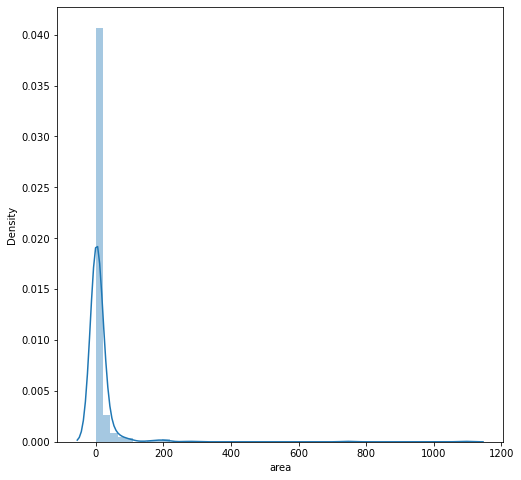

In [7]:
#plot to view data distribution and check skewness of data
plt.rcParams['figure.figsize'] = [8, 8]
sns.distplot(df['area']);

 The following data shows right skewness/positive skewness. Therefore, we will reduce
 skewness by taking log function,resulting in a more uniform distribution.

In [8]:
df['mod_area'] = np.log(df['area']+1)

<AxesSubplot:xlabel='mod_area', ylabel='Density'>

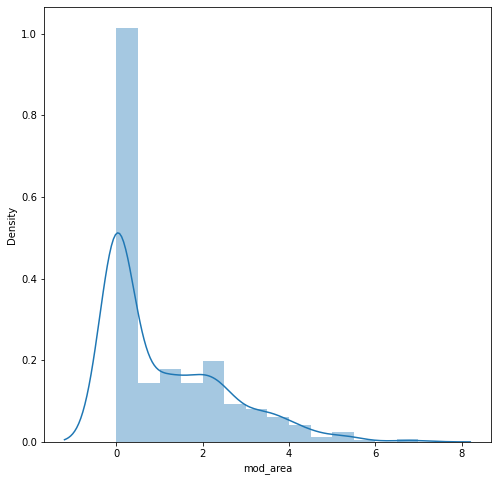

In [9]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.distplot(df['mod_area'])

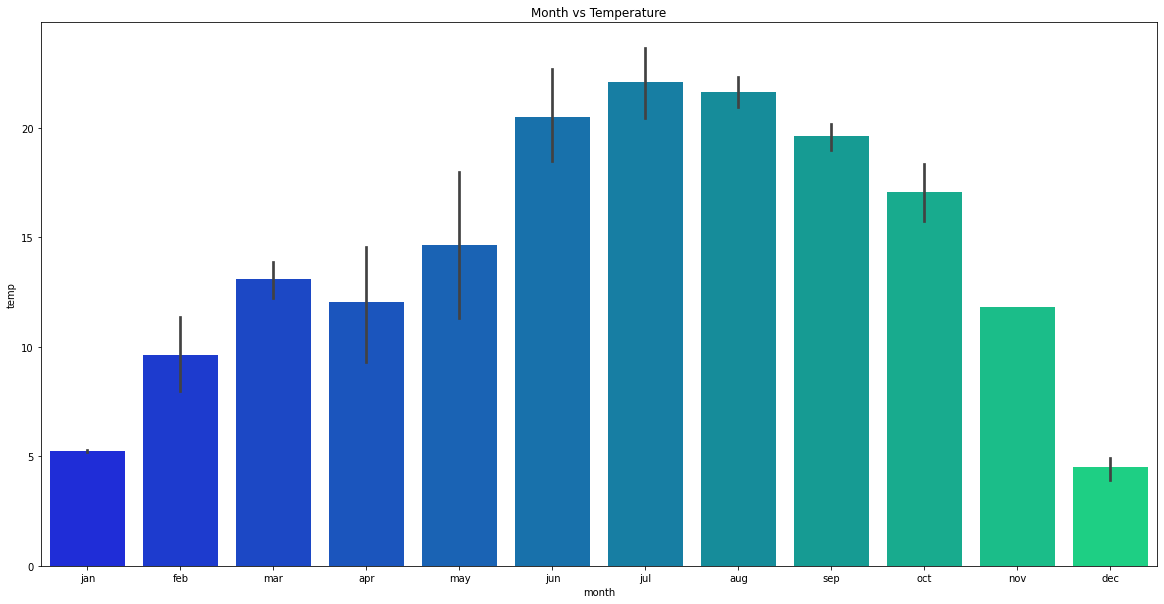

In [10]:
#relation between month and temperature
plt.rcParams['figure.figsize'] = [20, 10]
month_temp = sns.barplot(x = 'month', y = 'temp', data = df,order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title="Month vs Temperature");

In [11]:
df.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

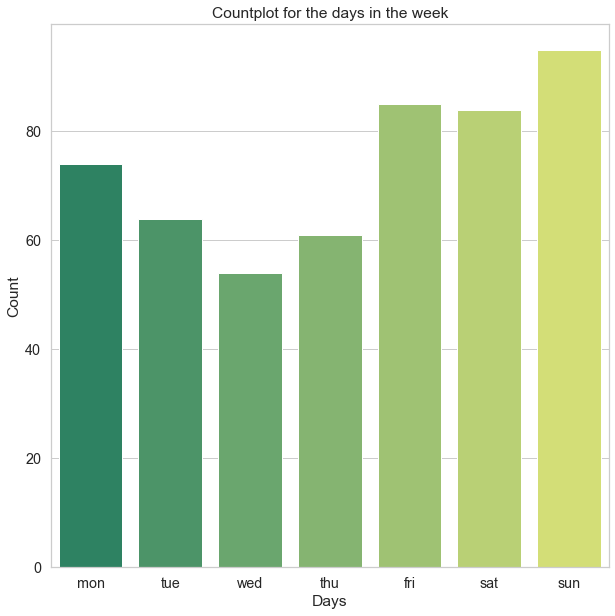

In [12]:
#countplot of fires wrt day of the week
plt.rcParams['figure.figsize'] = [10,10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(df['day'], order = ['mon','tue','wed','thu','fri','sat','sun'],palette='summer')
day.set(title = 'Countplot for the days in the week', xlabel = 'Days', ylabel = 'Count');

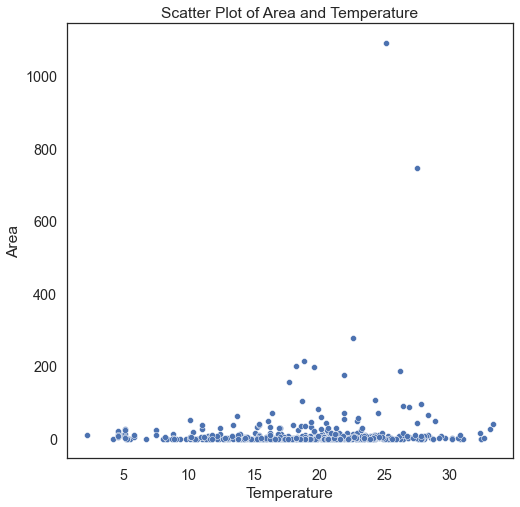

In [13]:
#scatterplot of area vs temperature
plt.rcParams['figure.figsize'] = [8, 8]
sns.set(style = "white", font_scale = 1.3)
scat = sns.scatterplot(df['temp'], df['area'])
scat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area");


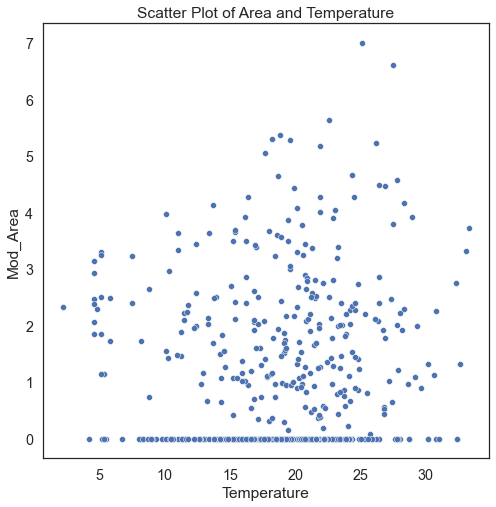

In [14]:
#scatterplot of temperature vs modded area
plt.rcParams['figure.figsize'] = [8, 8]
sns.set(style = "white", font_scale = 1.3)
scat = sns.scatterplot(df['temp'], df['mod_area'])
scat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Mod_Area");


<br>
Plots of both skewed area and the modified area will be plotted to examine the distribution.


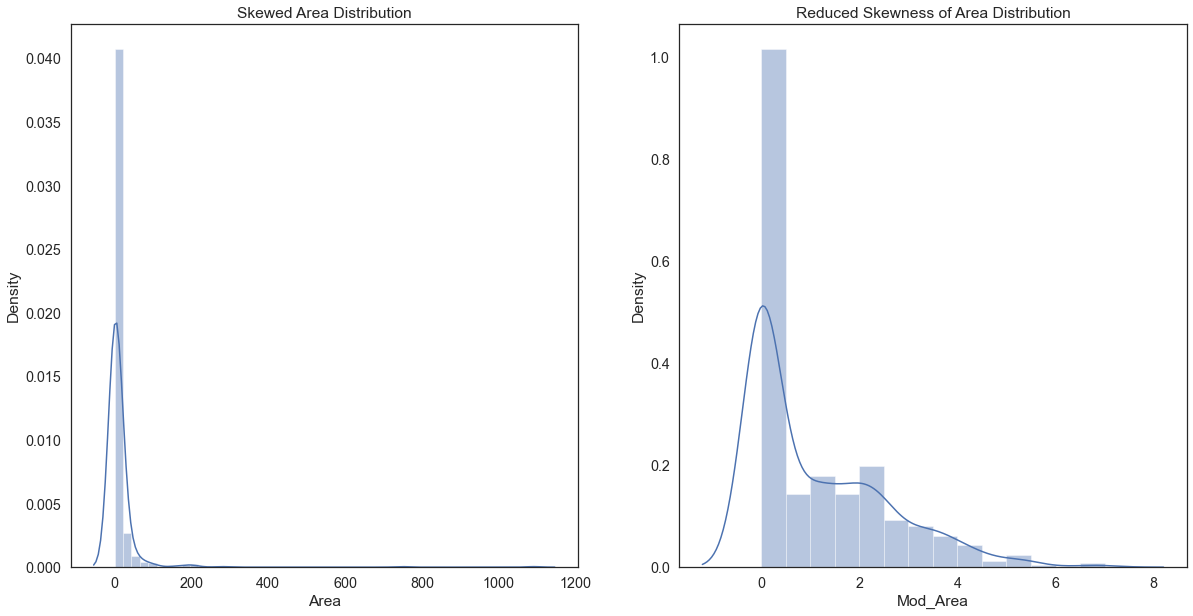

In [15]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = 'white', font_scale = 1.3)
fig, ax = plt.subplots(1,2)

# Distribution Plots
area_dist = sns.distplot(df['area'], ax = ax[0]);
area_dist_2 = sns.distplot(df['mod_area'], ax = ax[1]);
area_dist.set(title = "Skewed Area Distribution", xlabel = "Area", ylabel = "Density")
area_dist_2.set(title = "Reduced Skewness of Area Distribution", xlabel = "Mod_Area", ylabel = "Density");

<br>
A final look at all numerical columns to visualize the data in an efficient manner.

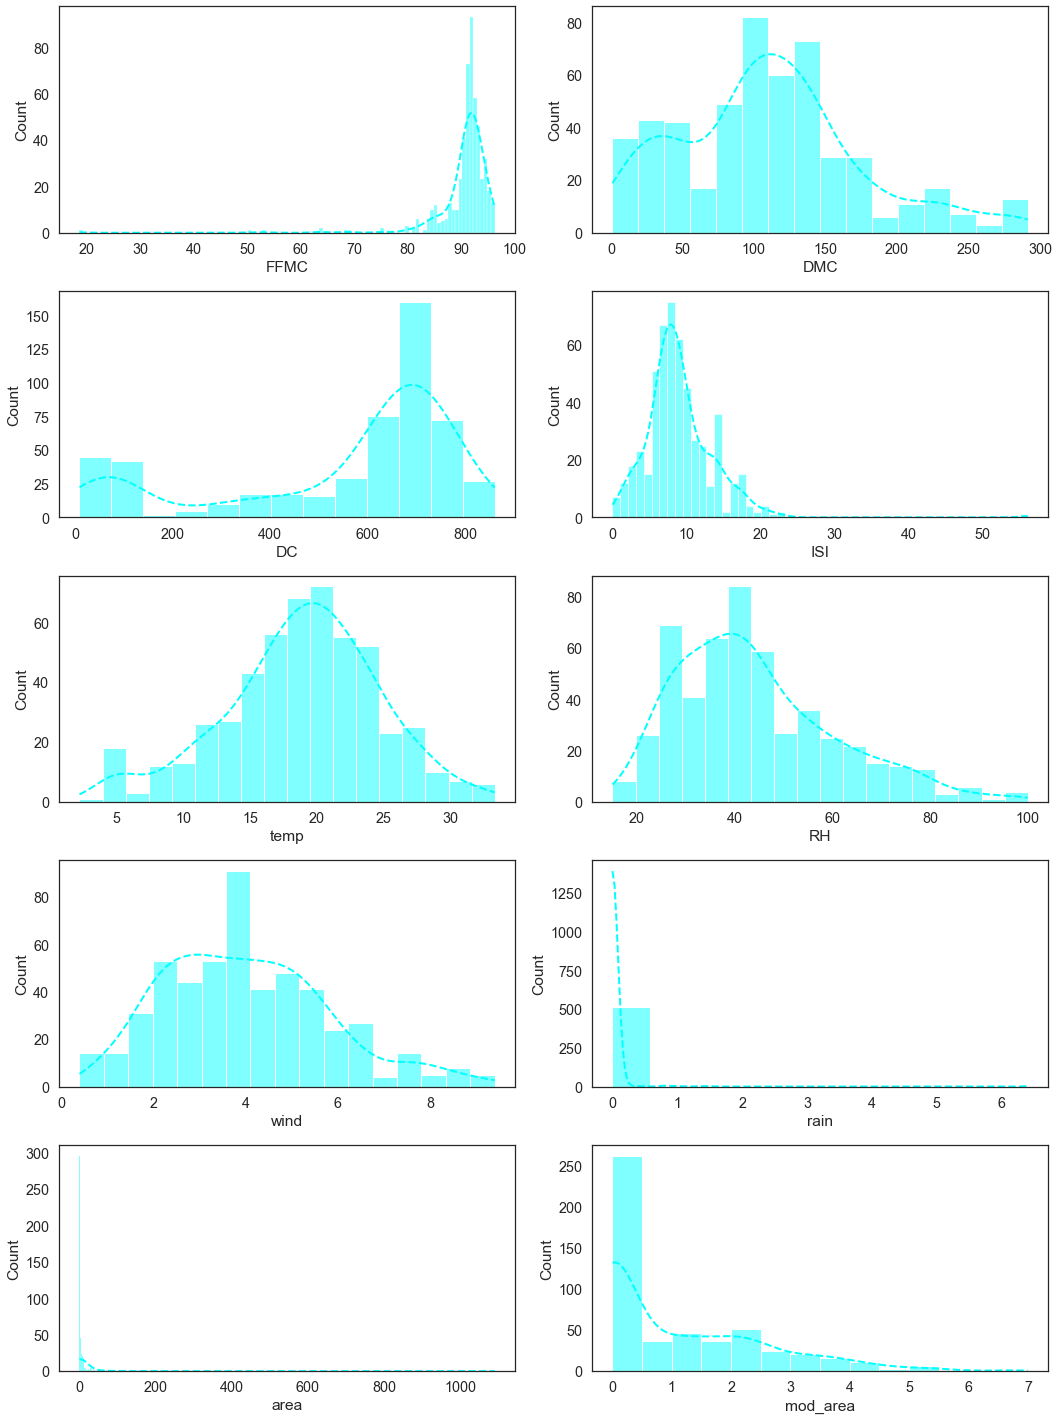

In [16]:
num_cols = df.select_dtypes(include='number').columns

fig, axs =  plt.subplots(nrows=5, ncols=2, figsize=(15,20))
axs = np.ravel(axs)

for i, col in enumerate(num_cols[2:]):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, line_kws={'linewidth':2, 'linestyle':'--'}, color='cyan')
    
plt.tight_layout()
plt.show()

<br>

We will now construct a correlation heatmap to figure out how closely the parameters are related to each other.

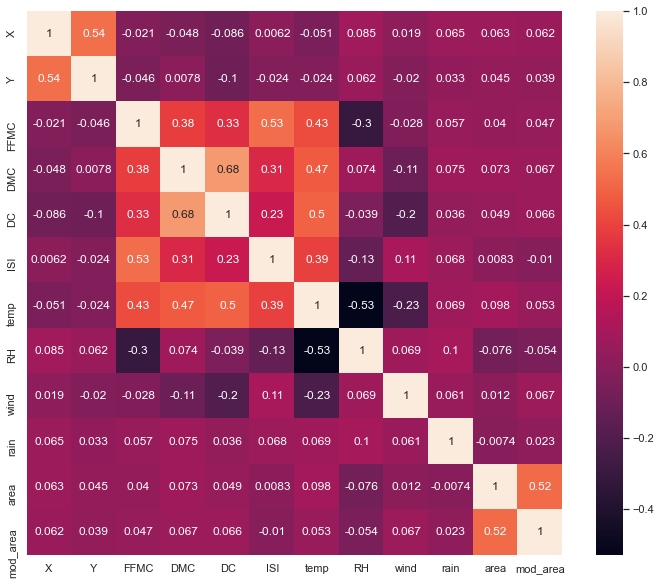

In [17]:
plt.rcParams['figure.figsize'] = [12, 10]
sns.set(font_scale = 1)
sns.heatmap(df.corr(), annot = True);

<br>
Fitting a normal distribution to the data, we get:

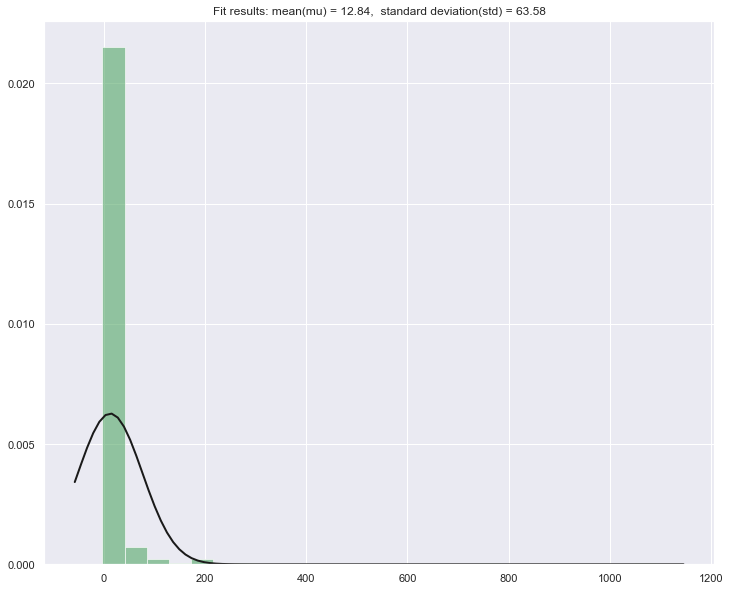

In [18]:
data = norm.rvs(df['area'])

# Fit a normal distribution to the data
mu, std = norm.fit(data)

plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mean(mu) = %.2f,  standard deviation(std) = %.2f" % (mu, std)
plt.title(title)

plt.show()

<title>
    Data Preprocessing

## Data Preprocessing

In [19]:
df['area'] = np.log(df['area'] + 1)
df.drop(columns = 'mod_area', inplace = True)

display(df)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


<br>
Normalizing features using MinMaxScaler(), in order to achieve better fit and accuracy on models.

In [20]:
# Normalization of the features
minmax = MinMaxScaler()

# FFMC, DMC, DC, ISI, RH
df['FFMC'] = minmax.fit_transform(np.array(df['FFMC']).reshape(-1, 1))
df['DMC'] = minmax.fit_transform(np.array(df['DMC']).reshape(-1, 1))
df['DC'] = minmax.fit_transform(np.array(df['DC']).reshape(-1, 1))
df['ISI'] = minmax.fit_transform(np.array(df['ISI']).reshape(-1, 1))
df['RH'] = minmax.fit_transform(np.array(df['RH']).reshape(-1, 1))

In [21]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,0.928318,0.378264,0.633329,0.160814,18.889168,0.344567,4.017602,0.021663,1.111026
std,2.313778,1.229900,0.071227,0.220698,0.290918,0.081274,5.806625,0.191970,1.791653,0.295959,1.398436
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.200000,0.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,0.922581,0.232598,0.504046,0.115865,15.500000,0.211765,2.700000,0.000000,0.000000
50%,4.000000,4.000000,0.940645,0.369400,0.769673,0.149733,19.300000,0.317647,4.000000,0.000000,0.418710
75%,7.000000,5.000000,0.957419,0.486906,0.827958,0.192513,22.800000,0.447059,4.900000,0.000000,2.024193
max,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,33.300000,1.000000,9.400000,6.400000,6.995620


We can see that the numerical attributes falls under a range of -1 to 1.

Changing categorical values into numerical values

In [22]:
df['month'].replace({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
                           'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12},
                           inplace = True)


df['day'].replace({'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6, 'sat' : 7}, inplace = True)

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,0.870968,0.086492,0.101325,0.090909,8.2,0.423529,6.7,0.0,0.0
1,7,4,10,3,0.927742,0.118194,0.775419,0.119430,18.0,0.211765,0.9,0.0,0.0
2,7,4,10,7,0.927742,0.146795,0.796294,0.119430,14.6,0.211765,1.3,0.0,0.0
3,8,6,3,6,0.941935,0.110958,0.081623,0.160428,8.3,0.964706,4.0,0.2,0.0
4,8,6,3,1,0.910968,0.172984,0.110590,0.171123,11.4,0.988235,1.8,0.0,0.0


Splitting the dataset into training and test sets.

In [23]:
target = df['area']
features = df.drop(columns = 'area')

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.15, random_state = 196)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (439, 12)
Test data set size :  (78, 12)


In [24]:
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
344,6,3,9,2,0.939355,0.444521,0.937258,0.133690,12.2,0.600000,4.9,0.0
6,8,6,8,2,0.949677,0.302550,0.571948,0.151515,24.1,0.141176,3.1,0.0
485,2,4,8,2,0.984516,0.463129,0.690043,0.379679,30.6,0.152941,3.6,0.0
419,2,5,8,1,0.940645,0.620951,0.709628,0.135472,24.8,0.247059,4.0,0.0
263,6,3,8,6,0.934194,0.482426,0.728509,0.126560,19.3,0.282353,3.6,0.0


In [25]:
y_train.head()

344    1.960095
6      0.000000
485    1.121678
419    1.398717
263    0.940007
Name: area, dtype: float64

## Applying Machine Learning models to the dataset:

We will now apply different Machine Learning models to make an attempt to fit and predict the area of the forest fires. The parameters chosen for the accuracy metrics are **Mean Squared Error** and **r2 score**.

<br>
Model 1 - Logistic Regression:

In [35]:
lr = LinearRegression()
lr.fit(X_train,y_train)

predictions = lr.predict(X_test)


print ("Mean Squared Error : ", mean_squared_error(y_test, predictions))
print ("r2 Score : ", r2_score(y_test, predictions))

Mean Squared Error :  1.6721913684845617
r2 Score :  -0.002195214621955932


<br>
<br>

Model 2 - Polynomial Regression with degree 4:

In [37]:
poly = PolynomialFeatures(4)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

model_2 = LinearRegression()
model_2.fit(poly_X_train, y_train)


predictions_poly = model_2.predict(poly_X_test)


print ("Mean Squared Error : ", mean_squared_error(y_test, predictions_poly))
print ("r2 Score : ", r2_score(y_test, predictions_poly))

Mean Squared Error :  421.21960520543945
r2 Score :  -251.44973786966315


<br>
<br>

Model 3 - Lasso Regression:

In [39]:
model_3 = Lasso(alpha = 100, max_iter = 10000) 
model_3.fit(X_train, y_train)


prediction = model_3.predict(X_test)


print ("Mean Squared Error : ", mean_squared_error(y_test, prediction))
print ("r2 Score : ", r2_score(y_test, prediction))

Mean Squared Error :  1.6692539081387816
r2 Score :  -0.0004347051747921604


<br>
<br>

Model 4 - Ridge Regression:

In [50]:
model_4 = Ridge(alpha = 500)
model_4.fit(X_train, y_train)


pred = model_4.predict(X_test)


print ("Mean Squared Error : ", mean_squared_error(y_test, pred))
print ("r2 Score : ", r2_score(y_test, pred))

Mean Squared Error :  1.6992124069124952
r2 Score :  -0.018389745892101628


<br>
<br>

Model 5 - Elastic Net Regression:

In [51]:
model_5 = ElasticNet(alpha = 100, max_iter = 10000)
model_5.fit(X_train, y_train)


pred1 = model_5.predict(X_test)


print ("Mean Squared Error : ", mean_squared_error(y_test, pred1))
print ("r2 Score : ", r2_score(y_test, pred1))

Mean Squared Error :  1.6692539081387816
r2 Score :  -0.0004347051747921604


<br>
<br>

Model 6 - Random Forest:

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred2 = rf.predict(X_test)
print("Mean Squared Error:",mean_squared_error(y_test,pred2))
print("r2 Score : ",r2_score(y_test,pred))

Mean Squared Error: 1.6860783234703478
r2 Score :  -0.04360845790640888


<br>
<br>

Model 7 - Support Vector Regressor(SVR):

In [62]:
model_6 = SVR(C = 100, kernel = 'linear')
model_6.fit(X_train, y_train)


prediction_svr = model_6.predict(X_test)


print ("Mean Squared Error : ", mean_squared_error(y_test, prediction_svr))
print ("r2 Score : ", r2_score(y_test, prediction))

Mean Squared Error :  1.9438843129613104
r2 Score :  -0.16502907080189222


<br>
<br>

The following models were tabulated along with their following accuracy metrics and are presented as follows:

In [70]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Polynomial Regression', 'Lasso Regression','Ridge Regression','Elastic Net Regression'
              ,'Random Forest','Support Vector Regression'],
    'MSE': [mean_squared_error(y_test, predictions),mean_squared_error(y_test, predictions_poly),
           mean_squared_error(y_test, prediction),mean_squared_error(y_test, pred),mean_squared_error(y_test, pred1),
           mean_squared_error(y_test, pred2),mean_squared_error(y_test, prediction_svr)],
    'r2_score': [r2_score(y_test, predictions),r2_score(y_test,predictions_poly),r2_score(y_test, prediction),
                r2_score(y_test, pred),r2_score(y_test, pred1),r2_score(y_test, pred2),r2_score(y_test, prediction_svr)]})

result_df = results.sort_values(by=['r2_score','MSE'], ascending=False)
result_df = result_df.set_index(['Model','r2_score','MSE'])
result_df.head(9)

,,
Model,r2_score,MSE
Elastic Net Regression,-0.000435,1.669254
Logistic Regression,-0.002195,1.672191
Random Forest,-0.010518,1.686078
Ridge Regression,-0.043608,1.741291
Lasso Regression,-0.165029,1.943884
Support Vector Regression,-0.165029,1.943884
Polynomial Regression,-251.449738,421.219605
